# Линейная регрессия с L1/L2/ElasticNet-регуляризацией

# Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

# Объявление данных

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_parquet(r'data11.parquet')

X = data.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis = 1).values
y = data['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаём пайплайны для регрессоров

In [3]:
models = {
    'Линейная регрессия': LinearRegression(),
    'Полиномиальная регрессия d=2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
}

# Создаём график и функцию визуализации

In [15]:
plt.figure(figsize=(10, 6))

def visualize(i, name, model):
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = model.predict(X)
    
    plt.subplot(3, 1, i)
    plt.plot(X_plot, y_plot.reshape(-1, 1)[:X_plot.shape[0]])
    plt.title(name)
    plt.scatter(X_train.reshape(-1, 1)[:y_train.shape[0]], y_train.reshape(-1, 1), color='black')
    plt.scatter(X_test.reshape(-1, 1)[:y_test.shape[0]], y_test.reshape(-1, 1), color='gold')

<Figure size 1000x600 with 0 Axes>

# Обучаем модели и вычисляем метрики

Черные точки - Train
Желтые точки - Test
Линейная регрессия - MSE: 0.00, R2: 1.00, Cross-Val MSE: 0.00
Полиномиальная регрессия d=2 - MSE: 0.06, R2: 1.00, Cross-Val MSE: 0.46


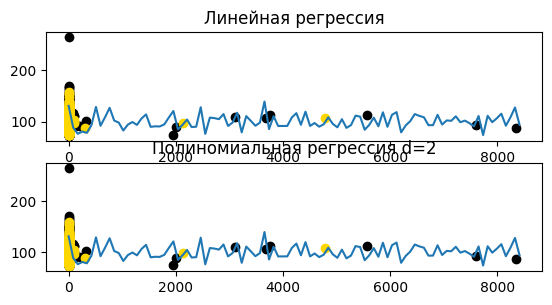

In [16]:
print('Черные точки - Train')
print('Желтые точки - Test')

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}, Cross-Val MSE: {-scores.mean():.2f}")

    visualize(i, name, model)
plt.show()